<a href="https://colab.research.google.com/github/LuisaGHerrera/MineriaDeDatos/blob/main/Notebook_final_Equipo6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Notebook final**

**Equipo** **6**; gpo: 01, *lunes*. 

Integrantes:

* 1794593 Gutiérrez Herrera Luisa Fernanda.
* 1796551 Sánchez Bracho Joss Alberth
* 1847156 Montemayor Guerra Diego Marcelo
* 1852645 Ovalle Salas Britany
* 1861240 Ávila Rodríguez Delfino Azael



**1.   Título de la base de datos principal.**

> **a)** Nombre con el que se encuentra en la página encontrada: *Video Game Sales.*

> **b)** Url de la página: *https://www.kaggle.com/gregorut/videogamesales*

**1.1. Título del póster.**
>*¿Cómo hacerte millonario con videojuegos?*

**2. Descripción de los datos.**
>**a)** Descripción breve de la base de datos: 
>>En esta base de datos encontraremos el ranking de los videojuegos más vendidos al 2016, superando cada uno las 100,000 copias vendidas, también podremos encontrar los ingresos en MDD que éstos generaron por individual en Norte América, Europa y Japón, entre otras cualidades como: el año de lanzamiento, genéro, plataforma de lanzamiento, etc.}

>**b)** Descripción básica de columnas y tamaño de la base.

In [ ]:
print("El número de columnas es:",len(bd.columns.values))
print("El número de filas es:",len(bd.index),"\n")
print("Nombre de columna / Tipo de dato\n")
print(bd.dtypes,"\n")   #Nos indica la columna y el tipo de datos que contiene.

El número de columnas es: 11
El número de filas es: 16598 

Nombre de columna / Tipo de dato

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object 



>>Podemos observar que la mayoría de nuestras columnas cuentan con datos flotantes pero las columnas "Name", "Platform", "Genre" y "Publisher" son categóricos y la columna "Rank" contiene datos de tipo entero.

**3. Justificación del uso de datos:**


> **a)** Cuáles fueron las características que les llamó la atención de los datos. Qué les hizo querer trabajar con ellos.


>>La base de datos tiene 3 cualidades destacables por la cual fue seleccionada:


>>1.   **Abarca más de 16,000 juegos de distintas plataformas:** Desde consolas de videojuegos como Wii, PS3 y XBOX 360 hasta PC.
2.   **Contiene información detallada acerca de los juegos:** Género (deportes, acción, plataformas, etc.), el año en que fue lanzado y la compañía que creó el producto.
3.   **Las ventas estan seccionadas a los 3 mercados más grandes:** Este incluye nuestro mercado de interés, Norte América.



---



> **b)** Qué beneficio encuentran de trabajar con estos datos.


>>Se puede aprovechar el uso de esta base de datos para responder preguntas como las siguientes:


>>*   ¿Cuáles fueron los juegos que más ingresos en ventas obtuvieron en el 2012?
*   ¿Qué compañía de videojuegos ha vendido más juegos respecto a las plataformas?

>>Esto permite **contestar preguntas acerca de los ingresos que han generado estos productos** y por consiguiente el tema de la base de datos no solo va a ser una actividad recreativa sino que el manejo de la información sea con propósitos pragmáticos.



**4. Mencionar los objetivos**


> **a)** Explicar a detalle cual es el objetivo principal (y secundarios en caso de existir) para trabajar con este tipo de datos.


>*   Definimos como nuestro objetivo principal:
>>Pronosticar cómo se comportarán las ventas que se obtendrían si lanzaramos un videojuego nuevo con las características de los videojuegos más vendidos en Norteamérica.

>* Objetivos secundarios:

>>1.   Identificar los géneros de videojuegos más populares mundialmente.
>>2. Identificar la desarrolladora con más videojuegos en nuestra BD.

##**Desarrollo de las herramientas**


###**1. Limpieza de datos**

> **a)** Mostrar los datos sin manipulación.

La base de datos original y sin manipular es la que se muestra a continuación:

In [ ]:
import pandas as pd
import numpy as np

bd= pd.read_csv("vgsales.csv") #Se lee y asigna la base de datos a la variable bd
bd

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


> **b)** Eliminar columnas no deseadas.

Para eliminar las columnas no deseadas, quisimos enfocarnos solo en las variables que estuvieran correlacionadas con las ventas en Norte América ya que es nuestro mercado objetivo. Hicimos uso de un mapa de correlación.

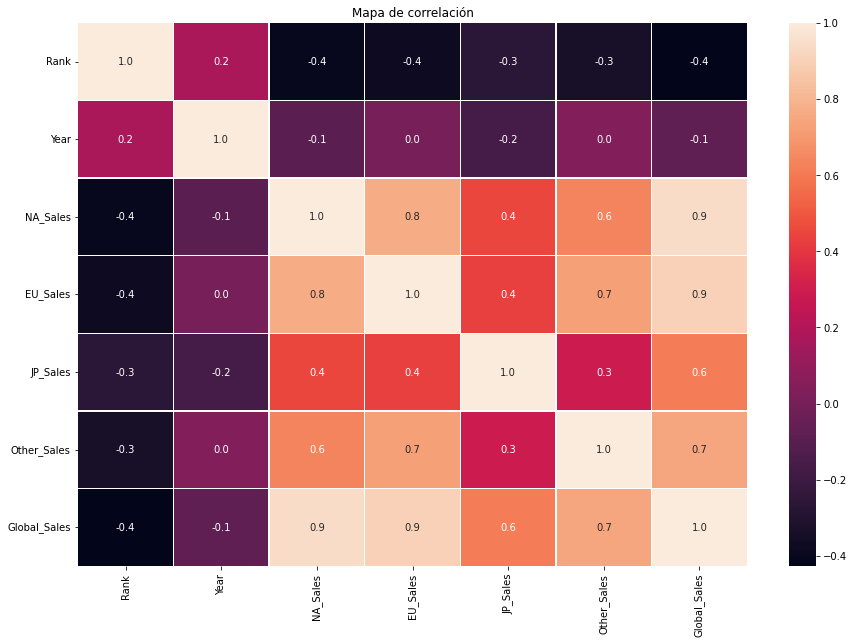

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

f,ax=plt.subplots(figsize = (15,10))

sns.heatmap(bd.corr(),annot= True,linewidths=0.5,fmt = ".1f")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Mapa de correlación')
plt.show()

Gracias a este mapa de calor podemos eliminar las variables que no están correlacionadas a NA_Sales (las ventas en Norteamérica). En este caso podemos eliminar JP_Sales (Ventas en Asia) ya que no ofrece una correlación importante con las ventas en Norteamérica.

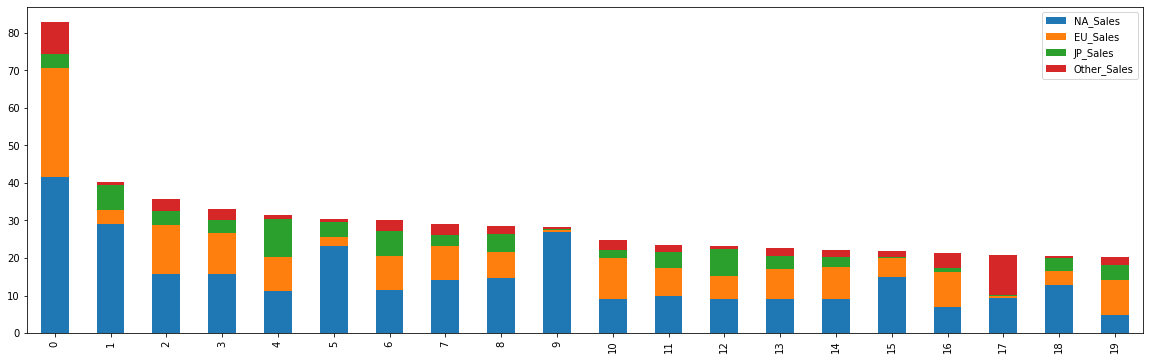

In [ ]:
bd_ventas=bd[['Name','NA_Sales','EU_Sales','JP_Sales','Other_Sales']].copy()
bd_ventas.head(20).plot.bar(stacked=True,figsize=(20,6)) 

>La gráfica anterior ayudó a reafirmar la eliminación de la columna JP_Sales ya que las ventas en Asia no representan una parte significativa de las ventas Globales de videojuegos, concluyendo lo mismo de las columnas EU_Sales (Ventas en Europa) y Other_Sales (Otras ventas).

In [ ]:
bdn= bd.drop(['EU_Sales','JP_Sales','Other_Sales'],axis=1) #Se elimina la columna indicada de nuestra bd.
bdn #creamos una nueva bd sin las columnas eliminadas.

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,31.37
...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01


Después de eliminar las columnas que no se utilizarán, cambiamos el nombre de cada columna a su traducción al español.

In [ ]:
bdn=bdn.rename(columns = {'Rank':'Ranking','Name':'Nombre','Platform':'Plataforma', 'Year':'Año', 'Genre':'Genero',
                     'Publisher':'Desarrolladora','NA_Sales':'Ventas_Norte_America_(MDD)', 'Global_Sales':'Ventas_Globales_(MDD)'})
bdn.head(3)

,Ranking,Nombre,Plataforma,Año,Genero,Desarrolladora,Ventas_Norte_America_(MDD),Ventas_Globales_(MDD)
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,35.82


> **c)** Correcta manipulación de los datos nulos dentro de la base de datos.

In [ ]:
print("Nombre de columna / Datos nulos\n")
bdn.isnull().sum() #Nos indica la cantidad de datos nulos en cada columna

Nombre de columna / Datos nulos



Ranking                         0
Nombre                          0
Plataforma                      0
Año                           271
Genero                          0
Desarrolladora                 58
Ventas_Norte_America_(MDD)      0
Ventas_Globales_(MDD)           0
dtype: int64

>>  Nuestra base de datos cuenta con 271 datos nulos en la columna "Año" y 58 en la columna "Desarrolladora" por lo que se decidió eliminar dichas filas, esto para solo considerar los videojuegos cuyo año de publicación y compañía son conocidos.

In [ ]:
bdn = bdn.dropna() #Se eliminan las filas con datos nulos en cualquier columna
bdn.isnull().sum()

Ranking                       0
Nombre                        0
Plataforma                    0
Año                           0
Genero                        0
Desarrolladora                0
Ventas_Norte_America_(MDD)    0
Ventas_Globales_(MDD)         0
dtype: int64

>>  Nuestra base de datos ya no cuenta con datos nulos.

> **e)** Crear un nuevo archivo con la base de datos editada.

In [ ]:
bdn.to_csv('vgsales sin NaN.csv', index=False, sep = ',')

###**2. Estadística básica de los datos.**

In [ ]:
bdn['Ventas_Norte_America_(MDD)'].describe()

count    16291.000000
mean         0.265647
std          0.822432
min          0.000000
25%          0.000000
50%          0.080000
75%          0.240000
max         41.490000
Name: Ventas_Norte_America_(MDD), dtype: float64

>> Dado que nuestro objetivo principal está desarrollado principalmente en las ventas que se generaron en Norte América, obtuvimos la descripción estadística de dicha columna, la cual nos muestra que:


>>>*   El rango de ventas en MDD es de [0, 41.49]
>>>*   El promedio de ventas es de 0.26 MDD
>>>*   La desviación estándar de los datos es de 0.82 lo que significa que las ventas están muy dispersas de la media.



In [ ]:
bdn['Desarrolladora'].describe()

count               16291
unique                576
top       Electronic Arts
freq                 1339
Name: Desarrolladora, dtype: object

>>El siguiente paso fue revisar la columna Desarrolladora y notamos que se cuenta con 576 compañías diferentes siendo Electronic Arts la más repetida en la base de datos.

In [ ]:
bdn['Genero'].describe()

count      16291
unique        12
top       Action
freq        3251
Name: Genero, dtype: object

>>Después, revisamos la columna "Género" y notamos que contamos con 12 géneros distintos, siendo Acción el más repetido.

###**3. Gráficas.**

In [ ]:
pd.plotting.register_matplotlib_converters()
import matplotlib as plt
%matplotlib inline
import seaborn as sns

Text(0.5, 1.0, 'Gráfica 1. Proporción de videojuegos por desarrolladora')

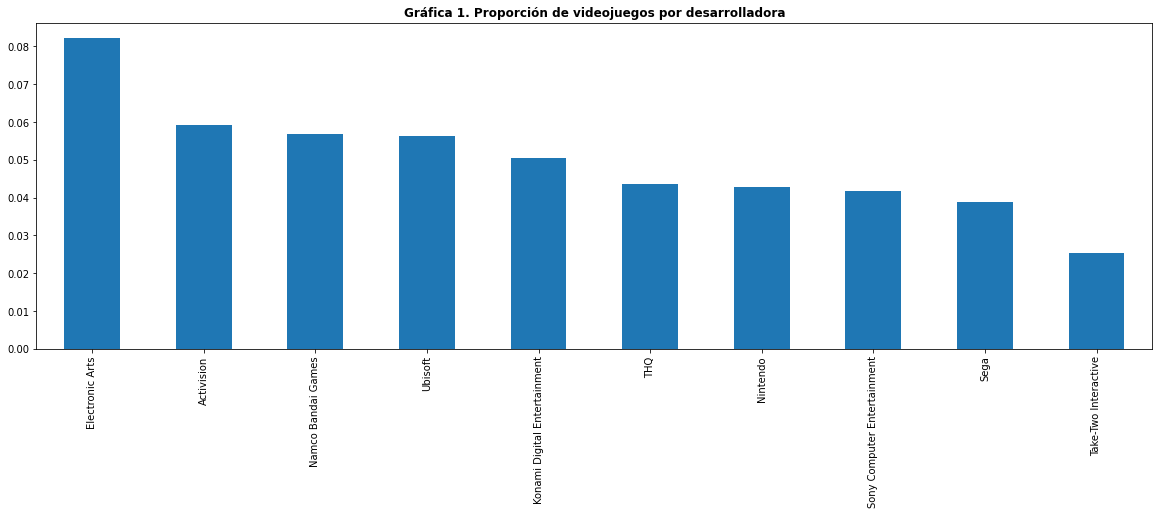

In [ ]:
(bdn['Desarrolladora'].value_counts().head(10)/len(bdn)).plot.bar(figsize=(20,6))
plt.title("Gráfica 1. Proporción de videojuegos por desarrolladora",fontweight="bold")

Con esta gráfica podemos observar la proporción de videojuegos por desarrolladora que conforman nuestra base de datos, concluyendo que más del 15% de nuestro ranking está conformado por videojuegos desarrollados por **Electronic Arts, Activision y Namco Bandai Games**.

#####Para realizar el gráfico correspondiente al total de ventas respecto a la desarrolladora, tendremos que realizar una agrupación.
>Realizaremos una nueva BD donde sólo estén las columnas "Desarrolladora" y "Ventas_Norte_América_(MDD)".


In [ ]:
bd_des= bdn.iloc[:, [5,6]] #Realizamos nueva bd con solo la columna desarrolladora y ventas en Norteamérica.
bd_des
#DUDAS: https://www.analyticslane.com/2019/06/21/seleccionar-filas-y-columnas-en-pandas-con-iloc-y-loc/

,Desarrolladora,Ventas_Norte_America_(MDD)
0,Nintendo,41.49
1,Nintendo,29.08
2,Nintendo,15.85
3,Nintendo,15.75
4,Nintendo,11.27
...,...,...
16593,Kemco,0.01
16594,Infogrames,0.01
16595,Activision,0.00
16596,7G//AMES,0.00


> Ahora con nuestra nueva BD, agruparemos nuestros datos de tal manera que podamos visualizar el total de ventas en (MDD) que cada desarrolladora de videojuegos obtuvó.

In [ ]:
bd_des_vts=bd_des.groupby(['Desarrolladora']).sum() #En esta agrupación se muestra una bd con la suma total de ventas en MDD por desarrolladora.
bd_des_vts=bd_des_vts.sort_values('Ventas_Norte_America_(MDD)',ascending=False) #Ordenamos de mayor a menor por ventas.
bd_des_vts
#DUDAS: https://medium.com/ironhack/data-cleaning-con-pandas-parte-2-a4e1f55e446b

,Ventas_Norte_America_(MDD)
Desarrolladora,
Nintendo,815.75
Electronic Arts,584.22
Activision,426.01
Sony Computer Entertainment,265.22
Ubisoft,252.81
...,...
Riverhillsoft,0.00
Milestone S.r.l,0.00
Focus Multimedia,0.00


Text(0.5, 1.0, 'Gráfica 2. Ventas en Norteamérica por desarrolladora')

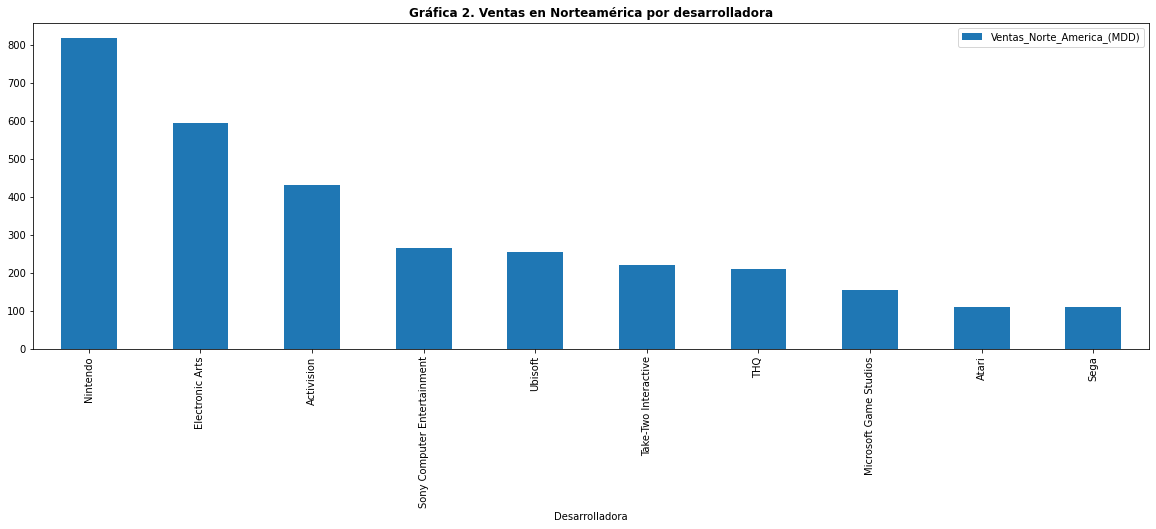

In [ ]:
bd_des_vts.head(10).plot(kind='bar',figsize=(20,6))
plt.title("Gráfica 2. Ventas en Norteamérica por desarrolladora",fontweight="bold")
#DUDAS:https://datacarpentry.org/python-ecology-lesson-es/guide/

> En esta gráfica podemos observar claramente como los videojuegos desarrollados por **Nintendo** son los que más ingresos en ventas obtuvieron, generando al menos 815.75 MDD, siguiendo los videojuegos de **Electronic Arts** obteniendo 584.22 MDD y teniendo en 3er lugar los videojuegos de **Activision** con 426.01 MDD.


Conociendo las desarrolladoras con mayor proporción de videojuegos en el mercado y mayores ingresos por ventas en Norteamérica, ahora buscaremos saber qué porcentaje ocupa cada género de videojuegos.

Text(0.5, 1.0, 'Gráfica 3. Proporción de videojuegos por género')

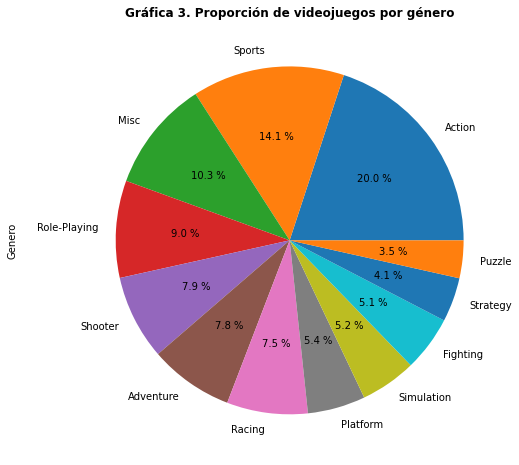

In [ ]:
bdn.Genero.value_counts().plot.pie(autopct="%0.1f %%",figsize=(8,8)).yaxis.labelpad=55
plt.title("Gráfica 3. Proporción de videojuegos por género",fontweight="bold")

En esta gráfica circular podemos observar la proporción de videojuegos por género que conforman nuestra base de datos, concluyendo que el género más frecuente es el de **Acción** con un 20%, siguiendo el género **Deportes** con 14.1% y teniendo en 3er lugar el genero **Misc** con un 10.3%.

#####Para realizar el gráfico correspondiente al total de ventas respecto a cada género, tendremos que realizar una agrupación.
>Realizaremos una nueva base de datos donde sólo estén las columnas "Género" y "Ventas_Norte_América_(MDD)".




In [ ]:
bd_gen= bdn.iloc[:, [4,6]] #Realizamos nueva bd solo con la columna género y ventas en Norteamérica.
bd_gen
#DUDAS: https://www.analyticslane.com/2019/06/21/seleccionar-filas-y-columnas-en-pandas-con-iloc-y-loc/

,Genero,Ventas_Norte_America_(MDD)
0,Sports,41.49
1,Platform,29.08
2,Racing,15.85
3,Sports,15.75
4,Role-Playing,11.27
...,...,...
16593,Platform,0.01
16594,Shooter,0.01
16595,Racing,0.00
16596,Puzzle,0.00


> Ahora con nuestra nueva BD, agruparemos nuestros datos de tal manera que podamos visualizar el total de ventas en (MDD) que cada género de videojuegos obtuvó.

In [ ]:
bd_gen_vts=bd_gen.groupby(['Genero']).sum() #En esta agrupación se muestra una bd con la suma total de ventas en MDD por género.
bd_gen_vts=bd_gen_vts.sort_values('Ventas_Norte_America_(MDD)',ascending=False) #Ordenamos de mayor a menor por ventas.
bd_gen_vts
#DUDAS: https://medium.com/ironhack/data-cleaning-con-pandas-parte-2-a4e1f55e446b
#       https://gonzalezgouveia.com/como-usar-matplotlib-%F0%9F%90%8D%F0%9F%92%BB-para-hacer-graficas-python-data-science/#Como_hacer_graficos_de_barras_en_Python

,Ventas_Norte_America_(MDD)
Genero,
Action,861.77
Sports,670.09
Shooter,575.16
Platform,445.99
Misc,396.92
Racing,356.93
Role-Playing,326.50
Fighting,220.74
Simulation,181.78


Text(0.5, 1.0, 'Gráfica 4. Ventas en Norteamérica por género')

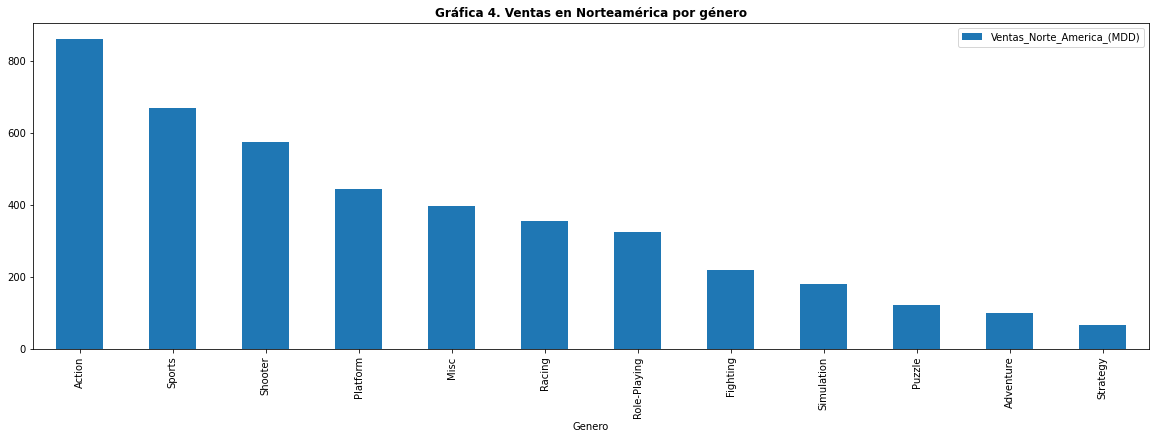

In [ ]:
bd_gen_vts.plot(kind='bar',figsize=(20,6))
plt.title("Gráfica 4. Ventas en Norteamérica por género",fontweight="bold")
#DUDAS:https://datacarpentry.org/python-ecology-lesson-es/guide/

> Podemos observar claramente como el género **Acción** fue el género que más ingresos en ventas obtuvo respecto a nuestro ranking, alcanzando los 861.17 MDD, siguiendo el género **Deportes** con 670.09 y teniendo en 3er lugar al género **Disparos** con 575.16 MDD.

Conociendo las 3 desarrolladoras que más ingresos generaron en Norteamérica (Nintendo, Electronic Arts y Activision) y los 3 géneros más populares (Acción, Deportes y Disparos), ahora revisaremos cuál fue el género de videojuegos que más dinero generó para cada una de las desarrolladoras antes mencionadas: 

1.   **Nintendo**: 



In [ ]:
bd_des_gen_vts= bdn.iloc[:, [4,5,6]] #Realizamos nueva bd con solo las columnas desarrolladora, género y ventas.
bd_n=bd_des_gen_vts[bd_des_gen_vts['Desarrolladora']=='Nintendo']
bd_n=bd_n.groupby(by=['Desarrolladora','Genero']).sum().sort_values('Ventas_Norte_America_(MDD)',ascending=False)
bd_n.head(3)
#DUDAS: https://interactivechaos.com/es/manual/tutorial-de-pandas/agrupaciones-en-dataframes

Ventas_Norte_America_(MDD)
Desarrolladora Genero                                  
Nintendo       Platform                          219.46
               Role-Playing                      105.63
               Sports                             98.77


2.   **Electronic arts**: 



In [ ]:
bd_ea=bd_des_gen_vts[bd_des_gen_vts['Desarrolladora']=='Electronic Arts']
bd_ea=bd_ea.groupby(by=['Desarrolladora','Genero']).sum().sort_values('Ventas_Norte_America_(MDD)',ascending=False)
bd_ea.head(3)

Ventas_Norte_America_(MDD)
Desarrolladora  Genero                             
Electronic Arts Sports                       263.50
                Shooter                       81.15
                Racing                        75.52


3.   **Activision**: 



In [ ]:
bd_a=bd_des_gen_vts[bd_des_gen_vts['Desarrolladora']=='Activision']
bd_a=bd_a.groupby(by=['Desarrolladora','Genero']).sum().sort_values('Ventas_Norte_America_(MDD)',ascending=False)
bd_a.head(3)

Ventas_Norte_America_(MDD)
Desarrolladora Genero                             
Activision     Shooter                      159.15
               Action                        86.83
               Sports                        52.19

Gracias al análisis previo, obtuvimos la siguiente información sobre los géneros más populares por desarrolladora:

>1.   *Nintendo* generó 219.46 MDD en el género Plataforma de sus 815.75 MDD totales (casi un 27% de las ventas obtenidas en Norteamérica).
>2.   *Electronic Arts* obtuvó 263.5 MDD en el género Deportes de su total de 584.22 MDD (poco más del 45% de sus ventas).
>3.   *Activision* consiguió 159.15 MDD en el género Disparos de sus 426.01 MDD obtenidos en ventas en NA (más del 37%).

####**Conclusión global:**
Durante el análisis gráfico previo se obtuvo una mejor idea acerca de las cualidades de los videojuegos con mayores ventas globales y en la región de Norte América.

Recapitulando, las principales características fueron las siguientes:


*   Nintendo, EA y Activision son las 3 desarrolladoras que más ingresos han generado en los géneros de Plataforma, Deportes y Disparos respectivamente.
*   El género de videojuegos más frecuente es el de Acción y el que ha generado más ingresos a nivel general.

A grandes rasgos podemos concluir que para una desarrolladora o empresa nueva en la industria de los videojuegos esta información le puede ser de utilidad no solamente para conocer las necesidades del mercado sino para tener más certeza al momento de lanzar un nuevo producto. Cabe mencionar que a lo largo del tiempo ha habido muchos cambios no solo en la tecnología sino en los gustos de los videojugadores, es decir, no porque el género de Acción haya sido el más frecuentado en los últimos tiempos significa que se pueda garantizar que seguirá así en un futuro.




###**4. Técnica de minería.**

**Serie de tiempo:**
>En este caso lo que queremos hacer son las proyecciones de las ventas de videojuegos desarrollados por 2 de las 3 compañías que más ingresos generaron en Norteamérica, ya que es nuestro mercado objetivo y con la práctica de visualización encontramos que **Nintendo** y **Electronic Arts** han obtenido más ventas en este mercado en los géneros de **Plataforma** y **Deportes** respectivamente. Por lo cual utilizaremos series de tiempo ya que es la técnica más adecuada para hacer proyecciones.

Lo primero que haremos es crear una nueva base de datos con las columnas de nuestro interés.
Se conservan solo las columnas:
*   Año
*   Genero
*   Desarrolladora
*   Ventas_Norte_America_(MDD)


Esta base será la que se agrupará por desarrolladora y género para realizar las proyecciones de cada compañía.

In [ ]:
bdt=bdn.drop(['Ranking','Nombre','Plataforma','Ventas_Globales_(MDD)'],axis=1)
bdt.head(5)

,Año,Genero,Desarrolladora,Ventas_Norte_America_(MDD)
0,2006.0,Sports,Nintendo,41.49
1,1985.0,Platform,Nintendo,29.08
2,2008.0,Racing,Nintendo,15.85
3,2009.0,Sports,Nintendo,15.75
4,1996.0,Role-Playing,Nintendo,11.27


####Comenzando por **Nintendo** y los videojuegos desarrollados en el género **Plataforma**:

In [ ]:
bd_ntd=bdt[bdt['Desarrolladora']=='Nintendo'] #Primero filtramos por que la Desarrolladora sea Nintendo
bd_ntd2=bd_ntd[bd_ntd['Genero']=='Platform'] #Filtro para indicar que el Genero es Plataforma
bd_ntd2=bd_ntd2.drop(['Genero','Desarrolladora'],axis=1) #Eliminar columnas extra para poder hacer la serie de tiempo.
bd_ntd=bd_ntd2.groupby(by='Año').sum()

Año = [1983,1985,1986,1988]
for i in range(1989,2016,1):
    Año.append(i)
bd_ntd.insert(0,"Año",Año)

bd_ntd=bd_ntd[1995:2015] #Solo tomamos a partir de los años que no presentan ausencia de información.
bd_ntd.to_csv(r'Nintendo_Platform.csv', index=False, header=True)
bd_ntd.head(5)

,Año,Ventas_Norte_America_(MDD)
Año,,
1995.0,1995,4.44
1996.0,1996,9.73
1997.0,1997,2.24
1998.0,1998,2.14
1999.0,1999,6.73


Visualizamos nuestra serie de tiempo:

Text(0.5, 1.0, 'Ventas Nintendo - Plataforma')

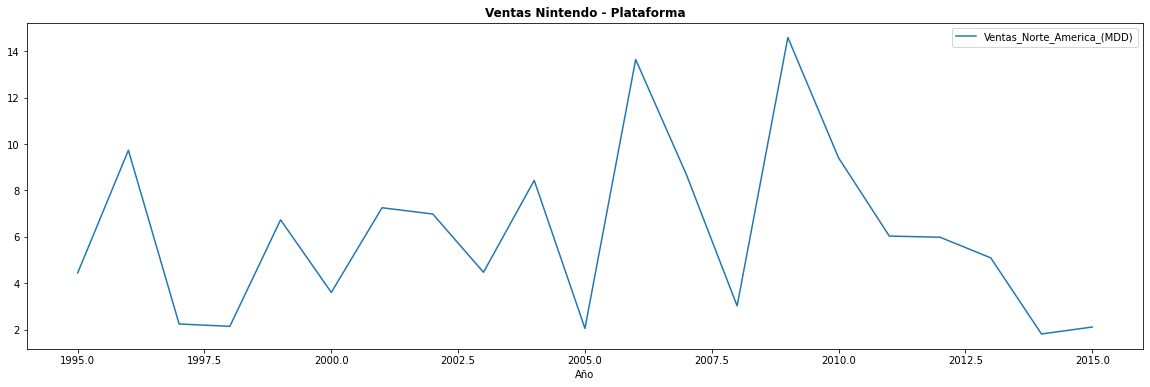

In [ ]:
bd_ntd.plot(y='Ventas_Norte_America_(MDD)',x='Año',figsize=(20,6))
plt.title("Ventas Nintendo - Plataforma",fontweight="bold")

#####Paso 1: CLASIFICACIÓN
>Tenemos que revisar si nuestra serie de tiempo no presenta cambios y es estacionaria por media y por varianza. Si cumple estacionariedad  en ambas, decimos que es *estacionaria*, si no, tendremos que realizar algunas modificaciones para conseguirlo.

*   Media
    
    Hipotésis nula = H0: No es un modelo significativo (B1 = 0). No tiene tendencia. 
    
    Hipotésis alternativa = Ha: Si es un modelo significativo (B1 <> 0). Tiene tendencia.

> Bloque con sangría



In [ ]:
 %load_ext rpy2.ipython

In [ ]:
%%R
install.packages("tseries")
library(tseries)


Call:
lm(formula = sdb ~ time(sdb))

Residuals:
    Min      1Q  Median      3Q     Max 
-4.0721 -2.9875 -0.2136  1.9563  8.7296 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept)  69.85432  164.86447   0.424    0.675
time(sdb)    -0.03196    0.08237  -0.388    0.701

Residual standard error: 3.521 on 26 degrees of freedom
Multiple R-squared:  0.005759,	Adjusted R-squared:  -0.03248 
F-statistic: 0.1506 on 1 and 26 DF,  p-value: 0.7011



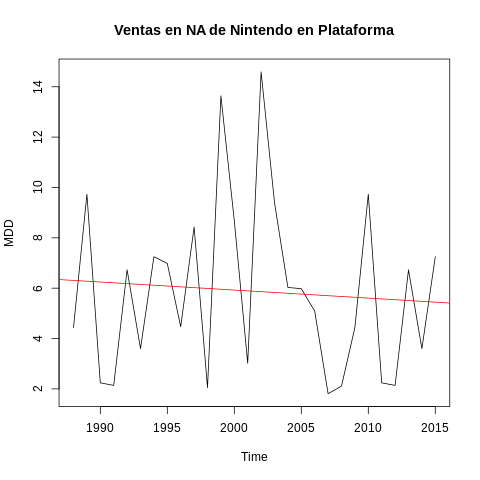

In [ ]:
%%R
db<-read.csv("Nintendo_Platform.csv",sep=",",header=T)
db

sdb<-ts(db$Ventas_Norte_America_.MDD.,start=1988,end=2015)
plot(sdb,main="Ventas en NA de Nintendo en Plataforma",ylab="MDD")

    t <- lm(sdb~time(sdb))
    abline(t,col="red")
    summary(t)

>Como se obtuvo un *p valor* = 0.7011 > *alfa*=0.05, **NO** rechazamos H0. Ahora sabemos que la serie es estacionaria en media.

*  Varianza

    H0: NO es estacionaria en varianza

    Ha: Es estacionaria en varianza

In [ ]:
%%R
adf.test(sdb)


	Augmented Dickey-Fuller Test

data:  sdb
Dickey-Fuller = -2.1176, Lag order = 3, p-value = 0.5275
alternative hypothesis: stationary



>Como se obtuvo un *p valor*=0.5275 > *alfa*=0.05 **NO** rechazamos HO. La serie NO es estacionaria en varianza.

>>**Clasificación final:** Serie *NO estacionaria* por varianza.

>Recurrimos a una corrección para conseguir que nuestra serie sea estacionaria y volvemos a revisar cambios en media y en varianza.

#####PASO 2: CORRECCIONES (solo si son necesarias)

In [ ]:
%%R
  c1<- diff(sdb)
    #Varianza
      #Ho: NO estacionaria en varianza
      #Ha: Estacionaria en varianza     
      adf.test(c1)


	Augmented Dickey-Fuller Test

data:  c1
Dickey-Fuller = -3.9296, Lag order = 2, p-value = 0.02604
alternative hypothesis: stationary



>Como ya habíamos logrado estacionariedad en media, no fue necesario revisarlo otra vez. 
Después de la corrección, se consiguió estacionariedad en varianza ya que se obtuvo un *p valor*=0.026 < *alfa*=0.05 y así se rechazó la hipotésis nula.
>>**Clasificación final:** Serie *estacionaria* por media y por varianza.

>Ya podemos pasar al modelado de la serie.

#####PASO 3: MODELADO
>Se procede a encontrar el mejor modelo ARMA(p,q) para nuestra serie estacionaria.

In [ ]:
%%R
      mejor.AIC.ARMA<-Inf
      for(j in 0:10){
        for(i in 0:10){
          y<-AIC(arima(c1,order=c(j,0,i),method="ML"))
          
          if(y<mejor.AIC.ARMA){
            mejor.AIC.ARMA<-y #Guardamos AIC
            pq<-c(j,i) #Guardando el orden
          }
        }
      }
      pq

[1] 0 4


In [ ]:
%%R
mejor.AIC.ARMA 

[1] 152.7032


>Se encontró que el mejor modelo para la serie es un ARMA(0,4) con un AIC=152.7032

#####PASO 4: PREDICCIONES

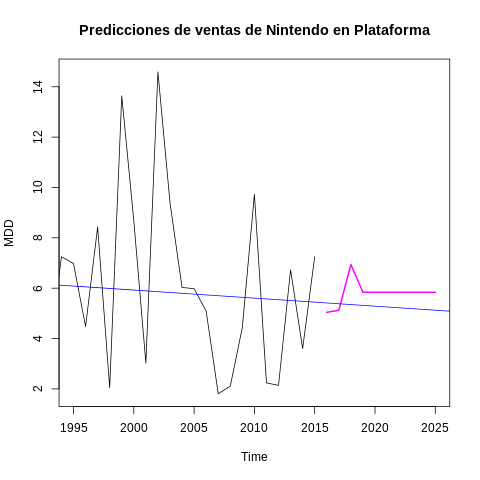

In [ ]:
%%R
  plot(sdb,xlim=c(1995,2025),main="Predicciones de ventas de Nintendo en Plataforma",ylab="MDD")
  pg<-predict(arima(sdb,order=c(0,1,4),method="ML"),n.ahead=10)$pred
  lines(pg,col="magenta",lwd=2)  
  abline(t,col="blue")  

>Interpretando la grafica de nuestra prediccion podemos decir que las ventas de Nintendo en el genero de Plataformas no van a sufrir caídas fuertes, y puede que se mantengan en niveles estables por 5 años. Esto se debe a que nuestro modelo no tiene coeficientes autoregresivos por lo tanto no influyen de una manera tan grande los valores pasados.

####Continuando con **Electronic Arts** y los videojuegos desarrollados en el género **Deportes**:

In [ ]:
bd_ela=bdt[bdt['Desarrolladora']=='Electronic Arts'] #Primero filtramos por que la Desarrolladora sea Electronic Arts
bd_ela2=bd_ela[bd_ela['Genero']=='Sports'] #Filtro para indicar que el Genero es Deportes
bd_ela2=bd_ela2.drop(['Genero','Desarrolladora'],axis=1) #Eliminar columnas extra para poder hacer la serie de tiempo.
bd_ela=bd_ela2.groupby(by='Año').sum()

Año = [1995]
for i in range(1996,2017,1):
    Año.append(i)
bd_ela.insert(0,"Año",Año)

bd_ela.to_csv(r'EA_Sports.csv', index=False, header=True)

bd_ela.head(5)

,Año,Ventas_Norte_America_(MDD)
Año,,
1995.0,1995,0.22
1996.0,1996,1.95
1997.0,1997,8.04
1998.0,1998,9.05
1999.0,1999,2.91


Visualizamos nuestra serie de tiempo:

Text(0.5, 1.0, 'Ventas Electronic Arts (EA) - Deportes')

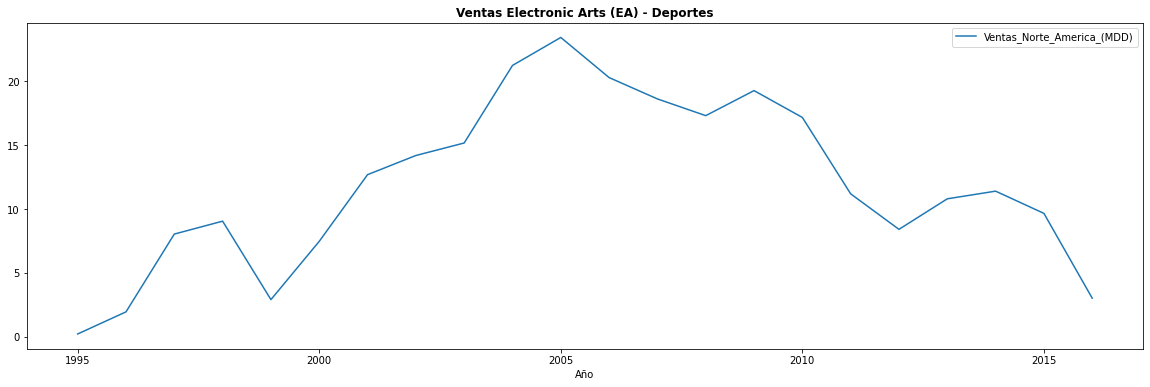

In [ ]:
bd_ela.plot(y='Ventas_Norte_America_(MDD)',x='Año',figsize=(20,6))
plt.title("Ventas Electronic Arts (EA) - Deportes",fontweight="bold")

#####Paso 1: CLASIFICACIÓN
>Tenemos que revisar si nuestra serie de tiempo no presenta cambios y es estacionaria por media y por varianza. Si cumple estacionariedad  en ambas, decimos que es *estacionaria*, si no, tendremos que realizar algunas modificaciones para conseguirlo.

*   Media
    
    Hipotésis nula = H0: No es un modelo significativo (B1 = 0). No tiene tendencia. 
    
    Hipotésis alternativa = Ha: Si es un modelo significativo (B1 <> 0). Tiene tendencia.


Call:
lm(formula = sdb2 ~ time(sdb2))

Residuals:
    Min      1Q  Median      3Q     Max 
-11.783  -4.455  -1.279   4.490  11.587 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept) -527.7978   440.9838  -1.197    0.245
time(sdb2)     0.2691     0.2199   1.224    0.235

Residual standard error: 6.543 on 20 degrees of freedom
Multiple R-squared:  0.06969,	Adjusted R-squared:  0.02318 
F-statistic: 1.498 on 1 and 20 DF,  p-value: 0.2352



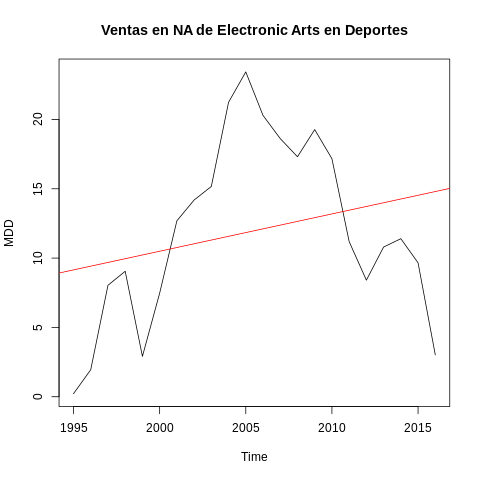

In [ ]:
%%R
db2<-read.csv("EA_Sports.csv",sep=",",header=T)
db2

sdb2<-ts(db2$Ventas_Norte_America_.MDD.,start=1995,end=2016)
plot(sdb2,main="Ventas en NA de Electronic Arts en Deportes",ylab="MDD")

    t <- lm(sdb2~time(sdb2))
    abline(t,col="red")
    summary(t)

>Como se obtuvo un *p valor* = 0.2352 > *alfa*=0.05, **NO** rechazamos H0. Ahora sabemos que la serie es estacionaria en media.

*  Varianza

    H0: NO es estacionaria en varianza

    Ha: Es estacionaria en varianza

In [ ]:
%%R
adf.test(sdb2)


	Augmented Dickey-Fuller Test

data:  sdb2
Dickey-Fuller = -0.054006, Lag order = 2, p-value = 0.99
alternative hypothesis: stationary



>Como se obtuvo un p valor=0.99 > alfa=0.05 **NO** rechazamos HO. La serie NO es estacionaria en varianza.

>>**Clasificación final:** Serie *NO estacionaria* por varianza.

>En esta serie también recurrimos a una corrección para conseguir que sea estacionaria y volvemos a revisar cambios en media y en varianza.

#####PASO 2: CORRECCIONES (solo si son necesarias)


*   Corrección 1:

In [ ]:
%%R
  c1<- diff(sdb2)
    #Varianza
      #Ho: NO estacionaria en varianza
      #Ha: Estacionaria en varianza
      adf.test(c1)


	Augmented Dickey-Fuller Test

data:  c1
Dickey-Fuller = -2.6817, Lag order = 2, p-value = 0.3127
alternative hypothesis: stationary



>Como ya habíamos logrado estacionariedad en media, no fue necesario revisarlo otra vez. 
Después de la corrección, NO se consiguió estacionariedad en varianza ya que se obtuvo un *p valor*=0.3127 > *alfa*=0.05. Tenemos que recurrir a otra diferenciación.

*   Corrección 2:

In [ ]:
%%R
  c2<- diff(c1)
    #Varianza
      #Ho: NO estacionaria en varianza
      #Ha: Estacionaria en varianza
      adf.test(c2)


	Augmented Dickey-Fuller Test

data:  c2
Dickey-Fuller = -4.4969, Lag order = 2, p-value = 0.01
alternative hypothesis: stationary



>Como ya habíamos logrado estacionariedad en media, no fue necesario revisarlo otra vez. 
Después de la segunda corrección, se consiguió estacionariedad en varianza ya que se obtuvo un *p valor*=0.01 < *alfa*=0.05 y así se rechazó la hipotésis nula.
>>**Clasificación final:** Serie *estacionaria* por media y por varianza.

>Ya podemos pasar al modelado de la serie.

#####PASO 3: MODELADO
>Se procede a encontrar el mejor modelo ARMA(p,q) para nuestra serie estacionaria.

In [ ]:
%%R
      mejor.AIC.ARMA<-Inf
      for(j in 0:10){
        for(i in 0:10){
          y<-AIC(arima(c2,order=c(j,0,i),method="ML"))
          
          if(y<mejor.AIC.ARMA){
            mejor.AIC.ARMA<-y #Guardamos AIC
            pq<-c(j,i) #Guardando el orden
          }
        }
      }
      pq 

[1] 0 3


In [ ]:
%%R
mejor.AIC.ARMA 

[1] 110.3673


>Se encontró que el mejor modelo para la serie es un ARMA(0,3) con un AIC=110.36

#####PASO 4: PREDICCIONES

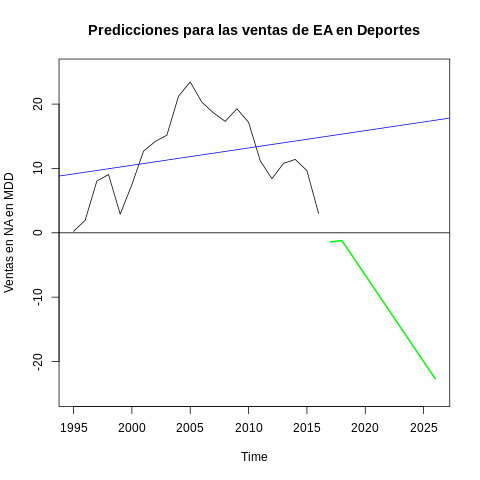

In [ ]:
%%R
  plot(sdb2,xlim=c(1995,2026),ylim=c(-25,25),ylab="Ventas en NA en MDD")
  title("Predicciones para las ventas de EA en Deportes")
  pg<-predict(arima(sdb2,order=c(0,2,3),method="ML"),n.ahead=10)$pred
  abline(h=0)
  lines(pg,col="green",lwd=2)  
  abline(t,col="blue")  
  

>Gracias a la gráfica anterior, podemos notar que las ventas de Electronic Arts en el género de Deportes van a sufrir una fuerte caída. Si bien no existen las ventas negativas como nos arroja nuestro modelo, estas ventas podrían interpretarse como un declive. Esto pensamos que se debe a que el mercado de videojuegos de deportes ha sido uno donde no se ha innovado tanto con respecto a las mecanicas de juego, por lo que creemos que esto debe de ser algo en lo que se deben de enfocar los desarrolladores de este género.

####Por último, revisaremos las predicciones de ventas de Nintendo (Desarrolladora que presentó mayores ventas en Norteamérica) en el género Acción (el más vendido):

In [ ]:
bd_ntd_ac=bdt[bdt['Desarrolladora']=='Nintendo'] #Primero filtramos por que la Desarrolladora sea Nintendo
bd_ntd_ac2=bd_ntd_ac[bd_ntd_ac['Genero']=='Action'] #Filtro para indicar que el Genero es Acción
bd_ntd_ac2=bd_ntd_ac2.drop(['Genero','Desarrolladora'],axis=1) #Eliminar columnas extra para poder hacer la serie de tiempo.
bd_ntd_ac=bd_ntd_ac2.groupby(by='Año').sum()

Año_n = [1984,1985,1986,1991,1992,1994]
for i in range(1996,2016,1):
    Año_n.append(i)
bd_ntd_ac.insert(0,"Año",Año_n)

bd_ntd_ac=bd_ntd_ac[1996:2016]
#bd_ntd_ac.to_csv(r'Nintendo_Action.csv', index=False, header=True)

bd_ntd_ac.head(5)

,Año,Ventas_Norte_America_(MDD)
Año,,
1996.0,1996,2.00
1997.0,1997,0.39
1998.0,1998,4.10
1999.0,1999,0.62
2000.0,2000,3.45


Visualizamos nuestra serie de tiempo:


*   NINTENDO:

Text(0.5, 1.0, 'Nintendo - Acción')

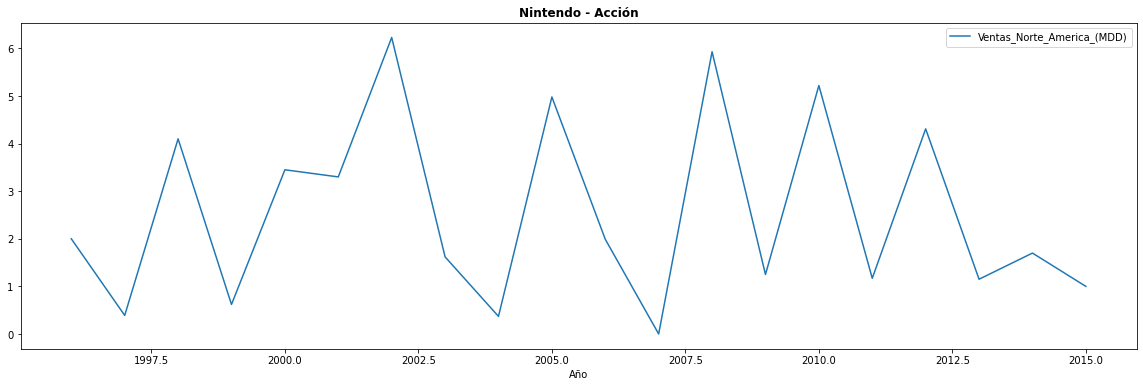

In [ ]:
bd_ntd_ac.plot(y='Ventas_Norte_America_(MDD)',x='Año',figsize=(20,6))
plt.title("Nintendo - Acción",fontweight="bold")

#####Paso 1: CLASIFICACIÓN
>Tenemos que revisar si nuestra serie de tiempo no presenta cambios y es estacionaria por media y por varianza. Si cumple estacionariedad  en ambas, decimos que es *estacionaria*, si no, tendremos que realizar algunas modificaciones para conseguirlo.

*   Media
    
    Hipotésis nula = H0: No es un modelo significativo (B1 = 0). No tiene tendencia. 
    
    Hipotésis alternativa = Ha: Si es un modelo significativo (B1 <> 0). Tiene tendencia.

In [ ]:
%%R
db3<-read.csv("Nintendo_Action.csv",sep=",",header=T)
sdb3<-ts(db3$Ventas_Norte_America_.MDD.,start=1996,end=2016)
    t <- lm(sdb3~time(sdb3))
    print(summary(t))


Call:
lm(formula = sdb3 ~ time(sdb3))

Residuals:
    Min      1Q  Median      3Q     Max 
-2.7675 -1.4539 -0.7728  1.8890  3.3034 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept)  66.69598  149.87393   0.445    0.661
time(sdb3)   -0.03181    0.07471  -0.426    0.675

Residual standard error: 2.073 on 19 degrees of freedom
Multiple R-squared:  0.009448,	Adjusted R-squared:  -0.04269 
F-statistic: 0.1812 on 1 and 19 DF,  p-value: 0.6751



>Como se obtuvo un *p valor* = 0.67 > *alfa*=0.05, **NO** rechazamos H0. Ahora sabemos que la serie de Nintendo es estacionaria en media.

*  Varianza

    H0: NO es estacionaria en varianza

    Ha: Es estacionaria en varianza

In [ ]:
%%R
print(adf.test(sdb3))


	Augmented Dickey-Fuller Test

data:  sdb3
Dickey-Fuller = -3.7095, Lag order = 2, p-value = 0.04218
alternative hypothesis: stationary



>Como se obtuvo un *p valor*=0.04 < *alfa*=0.05 **SI** rechazamos HO. La serie de Nintendo es estacionaria en varianza.

>>**Clasificación final:** Serie *estacionaria*.


#####PASO 2: CORRECCIONES (solo si son necesarias)
>En esta serie no recurrimos a ninguna corrección para conseguir que sea estacionaria puesto que eso ya se cumple.

#####PASO 3: MODELADO
>Se procede a encontrar el mejor modelo ARMA(p,q) para nuestras series estacionarias.

In [ ]:
%%R
      mejor.AIC.ARMA1<-Inf
      for(j in 0:10){
        for(i in 0:10){
          y<-AIC(arima(sdb3,order=c(j,0,i),method="ML"))
          
          if(y<mejor.AIC.ARMA1){
            mejor.AIC.ARMA1<-y #Guardamos AIC
            pq1<-c(j,i) #Guardando el orden
          }
        }
      }
      print(pq1)

[1] 7 0


In [ ]:
%%R
mejor.AIC.ARMA1 

[1] 83.75947


>Se encontró que el mejor modelo para la serie es un ARMA(7,0) con un AIC=83.75

#####PASO 4: PREDICCIONES

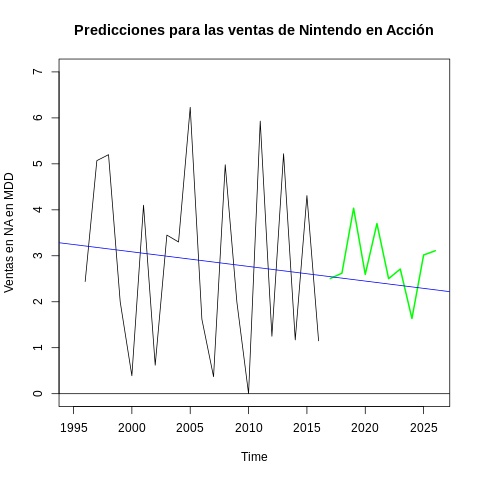

In [ ]:
%%R
  plot(sdb3,xlim=c(1995,2026),ylim=c(0,7),ylab="Ventas en NA en MDD")
  title("Predicciones para las ventas de Nintendo en Acción")
  pg<-predict(arima(sdb3,order=c(7,0,0),method="ML"),n.ahead=10)$pred
  abline(h=0)
  lines(pg,col="green",lwd=2)  
  abline(t,col="blue")  
  

>En la gráfica anterior podemos notar que se estima que va haber un decrecimiento en las ventas de Nintendo para los juegos de Acción cerca del año 2024 y esto indica que se pueden lanzar al mercado juegos de distinto género para compensar esa caída provisional.

Como **metrica de evaluación** utilizamos como indicador el *Criterio de Información de Akaike (AIC)* para encontrar el mejor modelo para nuestra serie de tiempo. Este indicador sirve para comparar distintos modelos y seleccionar el que mejor se adapte a nuestros datos. 

Comenzando el punto **4. Técnicas de Minería**, se realizó un ciclo doble para seleccionar el mejor modelo cuyo AIC fuera el menor y encontramos que este fue el ARIMA(7,0,0) con un AIC  de 83.75 para nuestras predicciones finales.

##Conclusión global:
Después de calcular las predicciones para Electronic Arts en el género Deportes y para Nintendo en Plataforma y Acción, llegamos a la conclusión de que el segmento más estable, y al que nos dirigiremos, es desarrollar videojuegos para las consolas de Nintendo en el género de Plataforma. Con base en nuestro pronóstico ese es el mercado más estable y el que genera mejores ventas, además de que hasta ahorita a la Nintendo Switch le restan 5 años de vida y eso puede ser una gran oportunidad para aquellas desarrolladoras que buscan un mercado potencial duradero.

#Conclusiones sobre trabajo a futuro
>Ahora que ya hicimos un estudio de cómo se encuentra el mercado, y de cuales son las características que hacen más rentable a un videojuego, como su género y consola en la que fue desarrollado. Para el futuro tenemos como interés profundizar en el videojuego; queremos ver qué características en la jugabilidad y en las historias de los videojuegos son las que generan más enganche con los jugadores. Para esto buscaremos una base de datos con reseñas de videojuegos y dejaremos de lado un poco las ventas para enfocarnos en la opinión de los críticos expertos y asi generar una lista de características que tengan los videojuegos con mayor calidad.

>Algo que podemos mejorar es el segmentar por décadas y hacer un análisis mas exhaustivo de como se ha comportado el videojuego a lo largo de la historia y de cómo las ventas se han relacionado con los momentos que han vivido las economías de los distintos mercados.